In [1]:
# IMPORTS
import matplotlib.pyplot as plt
import napari
import skimage as ski
import numpy as np

In [2]:
# UTILITY FUNCTIONS 
def load_image(filepath:str, slices_skipped: int, show_img: bool):
    img:np.ndarray = ski.io.imread(filepath)
    channel_idx = 3 if img.shape[0] == 5 else 2
    img = img[channel_idx, slices_skipped:, :, :]

    # image normalization
    img = (img - np.min(img))/(np.max(img) - np.min(img))
    
    if show_img:
        viewer = napari.view_image(img)
        napari.run()

    return img


In [7]:
img_path = "/mnt/c/Users/quantum/Desktop/Uni/MScThesis/collagen/CellsTGF_TGF_D1/15_D6.nd2.ome.tif"
img = load_image(img_path, 0, False)

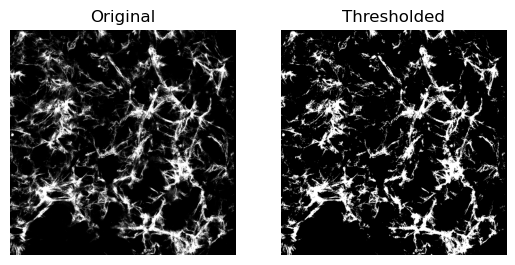

In [9]:
# OTSU THRESHOLDING

from skimage.filters import threshold_otsu
image = img[-1, :, :]
thresh = threshold_otsu(image)
binary = image > thresh 

fig, axes = plt.subplots(ncols=2)
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

plt.savefig('threshold.png', dpi=500)

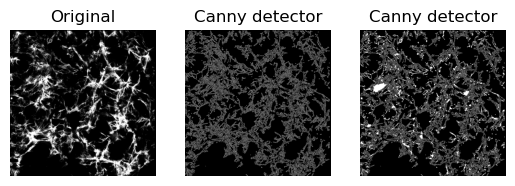

In [13]:
# EDGE SEGMENTATION

from skimage.feature import canny
from scipy import ndimage as ndi

edges = canny(image)
filled_edges = ndi.binary_fill_holes(edges)

fig, axes = plt.subplots(ncols=3)
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Canny detector')
ax[1].set_axis_off()

ax[2].imshow(filled_edges, cmap=plt.cm.gray)
ax[2].set_title('Canny detector')
ax[2].set_axis_off()
plt.savefig('edgesegm.png', dpi=500)

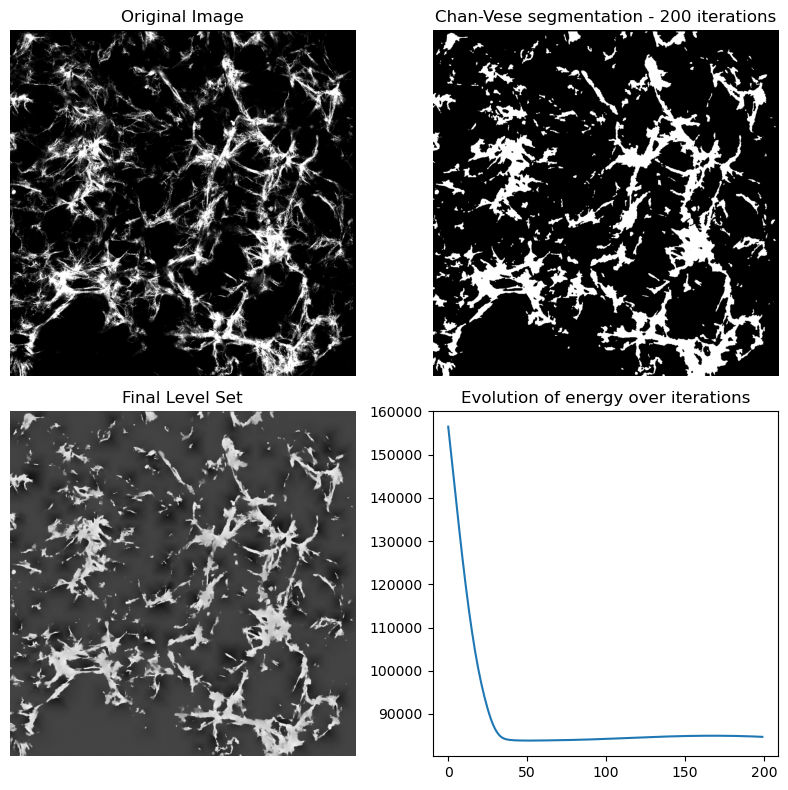

In [29]:
# Chan-Vase

from skimage.segmentation import chan_vese

cv = chan_vese(
    image,
    mu=0.25,
    lambda1=1,
    lambda2=1,
    tol=1e-3,
    max_num_iter=200,
    dt=0.5,
    init_level_set="checkerboard",
    extended_output=True,
)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()